<a href="https://colab.research.google.com/github/O-NS23/AI-Developer-Performance-Analysis/blob/main/AI_Developer_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import the libraries required.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report


#2: Read the dataset.

In [3]:
df=pd.read_csv('/content/AI_Developer_Performance.csv')
df.head()

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
0,7,416,9,7,6,5.9,92,34,7,99,10.5,20,3
1,4,269,16,13,5,5.1,85,36,2,100,9.5,17,8
2,11,439,3,0,2,6.2,38,79,2,55,18.3,35,2
3,8,472,15,9,4,4.2,26,94,5,30,12.6,28,4
4,5,265,19,16,5,8.1,82,33,6,82,7.0,25,9


#3. Understand the dataset

In [4]:
df.info() #For knowing the Null Count and DataTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours_Coding         1000 non-null   int64  
 1   Lines_of_Code        1000 non-null   int64  
 2   Bugs_Found           1000 non-null   int64  
 3   Bugs_Fixed           1000 non-null   int64  
 4   AI_Usage_Hours       1000 non-null   int64  
 5   Sleep_Hours          1000 non-null   float64
 6   Cognitive_Load       1000 non-null   int64  
 7   Task_Success_Rate    1000 non-null   int64  
 8   Coffee_Intake        1000 non-null   int64  
 9   Stress_Level         1000 non-null   int64  
 10  Task_Duration_Hours  1000 non-null   float64
 11  Commits              1000 non-null   int64  
 12  Errors               1000 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 101.7 KB


In [5]:
df.describe() #Statistical Summary

,Hours_Coding,Lines_of_Code,Bugs_Found,Bugs_Fixed,AI_Usage_Hours,Sleep_Hours,Cognitive_Load,Task_Success_Rate,Coffee_Intake,Stress_Level,Task_Duration_Hours,Commits,Errors
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.84000,356.23400,9.876000,7.153000,2.961000,6.465800,56.933000,56.578000,3.368000,66.410000,8.700100,17.253000,4.544000
std,3.15854,188.15535,5.796052,5.468226,2.021278,1.439529,21.767506,20.814879,2.342234,21.865452,5.992891,10.836901,2.820997
min,1.00000,26.00000,0.000000,0.000000,0.000000,4.000000,20.000000,30.000000,0.000000,30.000000,0.500000,1.000000,0.000000
25%,3.00000,209.50000,5.000000,2.000000,1.000000,5.200000,38.000000,37.000000,1.000000,48.000000,4.000000,9.000000,2.000000
50%,6.00000,332.00000,10.000000,7.000000,3.000000,6.400000,57.000000,55.500000,3.000000,66.000000,7.450000,14.000000,5.000000
75%,9.00000,480.50000,15.000000,12.000000,5.000000,7.700000,76.000000,74.000000,5.000000,86.000000,12.000000,23.000000,7.000000
max,11.00000,993.00000,19.000000,19.000000,6.000000,9.000000,94.000000,100.000000,7.000000,100.000000,27.500000,50.000000,9.000000


In [6]:
df.shape  #No. of rows, No. of Columns

(1000, 13)

In [7]:
df.duplicated().sum()  #No duplicates

np.int64(0)

#4. Exploratory Data Analysis

4.1 Plotting Correlation Heatmap

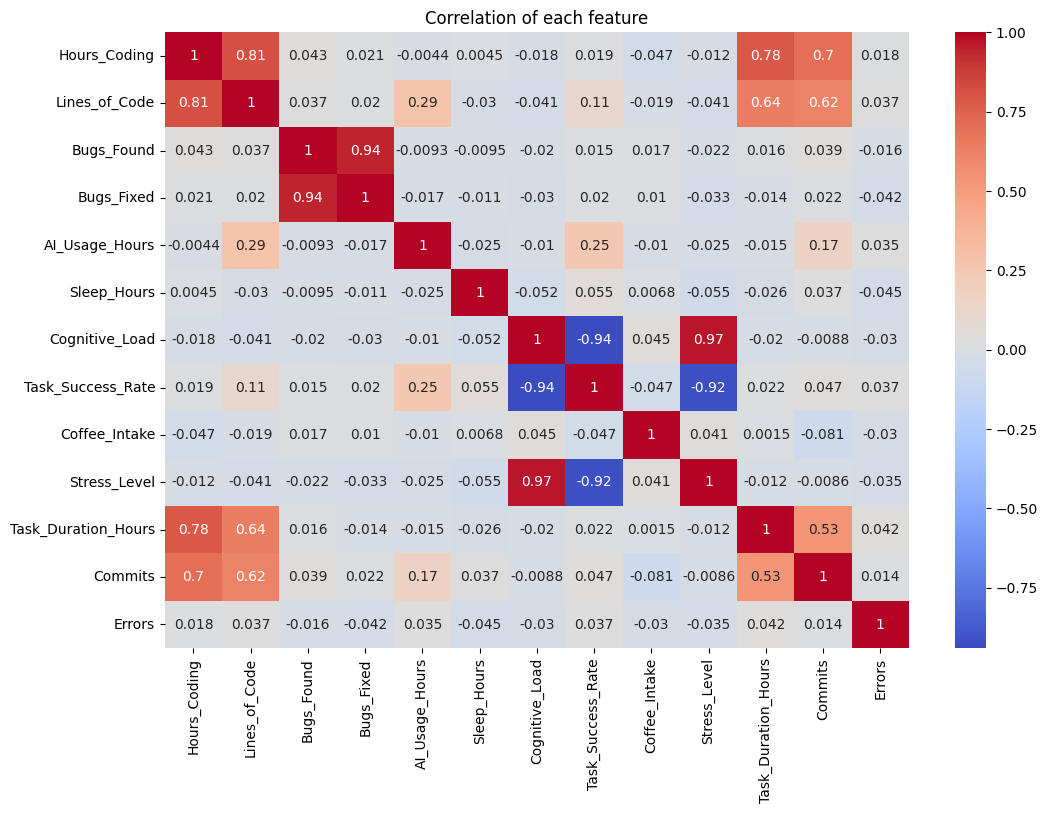

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation of each feature')
plt.show()


4.2 Key Relationship Plots

4.2.1 Coding Hours vs Task success rate

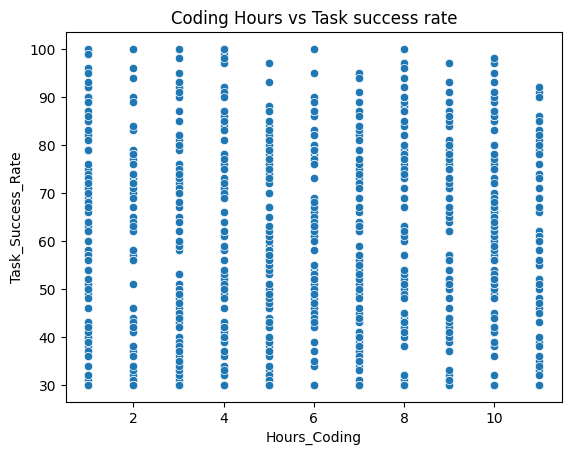

In [9]:
sns.scatterplot(x="Hours_Coding", y="Task_Success_Rate", data=df)
plt.title('Coding Hours vs Task success rate')
plt.show()


**Hours_Coding & Task_Duration are Highly Related**

Hours_Coding strongly correlates with:

Lines_of_Code (0.81)

Task_Duration_Hours (0.78)

Commits (0.70)   
👉 Meaning: More working hours = more output

But…   
📌 They do not strongly improve Task_Success_Rate directly.

4.2.2 AI usage vs Success

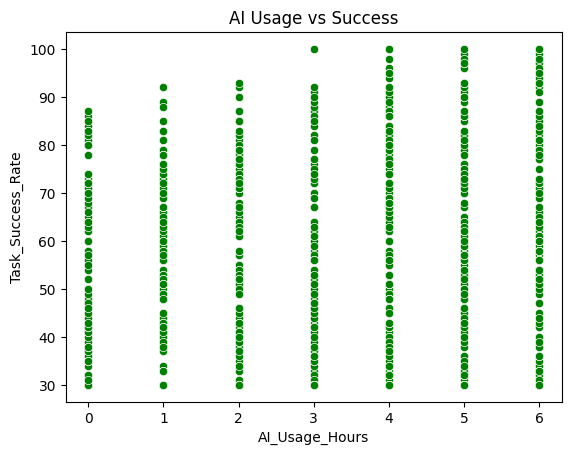

In [10]:
sns.scatterplot(x="AI_Usage_Hours", y="Task_Success_Rate", data=df,color='green')
plt.title('AI Usage vs Success')
plt.show()

**AI Usage Improves Success**

AI_Usage_Hours has positive correlation with:

Task_Success_Rate (~0.25)
👉 Meaning:

Developers using AI tools moderately perform better.

4.2.3 Sleep vs Success

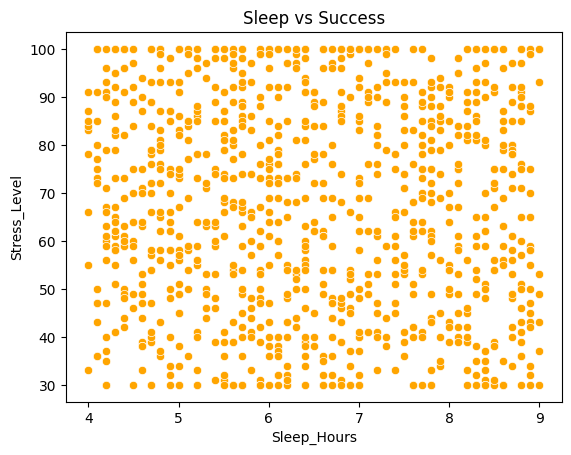

In [11]:
sns.scatterplot(x="Sleep_Hours", y="Stress_Level", data=df, color='orange')
plt.title('Sleep vs Success')
plt.show()


**Sleep vs Stress — Strong Relation**

Sleep_Hours has strong negative correlation with:

Stress_Level = -0.92

Sleep_Hours has strong positive correlation with:

Task_Success_Rate = +0.94


More sleep → less stress → higher task success

4.2.4 Coffee vs Success

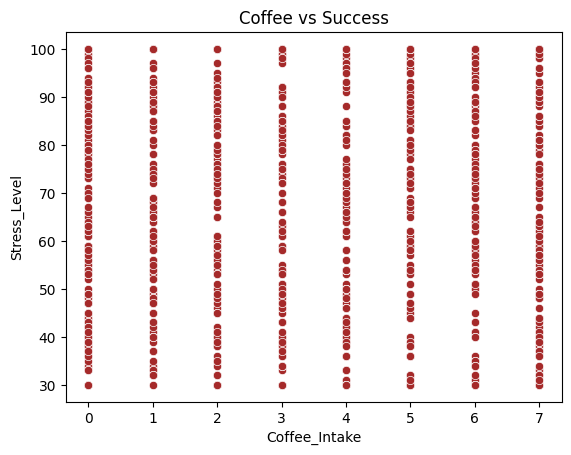

In [12]:
sns.scatterplot(x="Coffee_Intake", y="Stress_Level", data=df, color='brown')
plt.title('Coffee vs Success')
plt.show()


Coffee has almost no meaningful correlation
So it doesn't matter much statistically.

4.2.5 Bugs Found vs Bugs Fixed

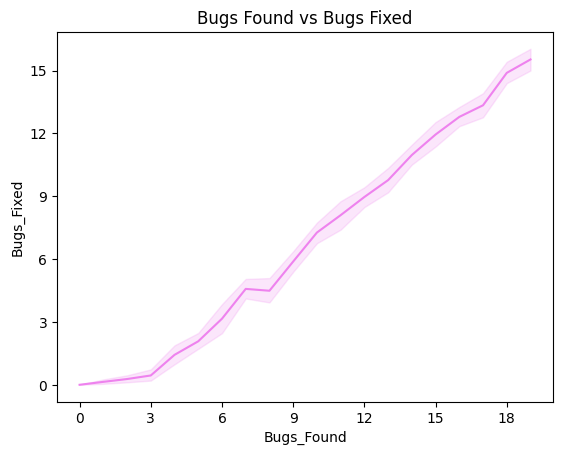

In [13]:
sns.lineplot(x="Bugs_Found", y="Bugs_Fixed", data=df, color='violet')
plt.xticks(range(0, 19, 3))
plt.yticks(range(0, 16, 3))
plt.title('Bugs Found vs Bugs Fixed')
plt.show()


Extremely strong correlation (0.94)

Means developers generally fix most bugs they find.

State targets:

Predict Task Success Rate

Predict Stress Level

Predict Errors

And define ML task type:

These are Regression problems

#5. Train-Test Split + Model Preparation

5.1 Prepare data for modelling

Separate Features & Targets

In [14]:
X = df.drop(columns=["Task_Success_Rate","Stress_Level","Errors"])

y_success = df["Task_Success_Rate"]
y_stress  = df["Stress_Level"]
y_errors  = df["Errors"]

5.2 Train-Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_success, y_test_success = train_test_split(
    X, y_success, test_size=0.2, random_state=42
)

_, _, y_train_stress, y_test_stress = train_test_split(
    X, y_stress, test_size=0.2, random_state=42
)

_, _, y_train_errors, y_test_errors = train_test_split(
    X, y_errors, test_size=0.2, random_state=42
)


#6. Build Models + Improve Accuracy

6.1 — Build Pipeline (Scaling + Model)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [17]:
pipeline_success = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipeline_success.fit(X_train, y_train_success)
y_pred_success = pipeline_success.predict(X_test)


6.2 — Evaluate Model Performance

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
print('====Linear Regression====')
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"MAE  : {mae}")
    print(f"MSE  : {mse}")
    print(f"RMSE : {rmse}")
    print(f"R2   : {r2}")

evaluate(y_test_success, y_pred_success)


====Linear Regression====
MAE  : 4.17343900884197
MSE  : 26.227647472312814
RMSE : 5.121293535066391
R2   : 0.9352566663540388


6.3 — Improve Accuracy (Try Stronger Models)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train_success)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test_success, preds)
    mse = mean_squared_error(y_test_success, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_success, preds)

    results[name] = [mae, mse, rmse, r2]

# Display results nicely
print("==== Model Performance Comparison ====")
for name, metrics in results.items():
    print(f"\n{name}")
    print("MAE :", metrics[0])
    print("MSE :", metrics[1])
    print("RMSE:", metrics[2])
    print("R2  :", metrics[3])


==== Model Performance Comparison ====

Linear Regression
MAE : 4.173439008841973
MSE : 26.22764747231281
RMSE: 5.121293535066391
R2  : 0.9352566663540388

Random Forest
MAE : 3.7153499999999995
MSE : 22.919346500000003
RMSE: 4.787415430062447
R2  : 0.9434232559758421

Gradient Boosting
MAE : 3.572833178312236
MSE : 20.808933068529
RMSE: 4.561680947691213
R2  : 0.948632842579783

XGBoost
MAE : 3.751605272293091
MSE : 21.771982192993164
RMSE: 4.666045669835773
R2  : 0.9462555646896362


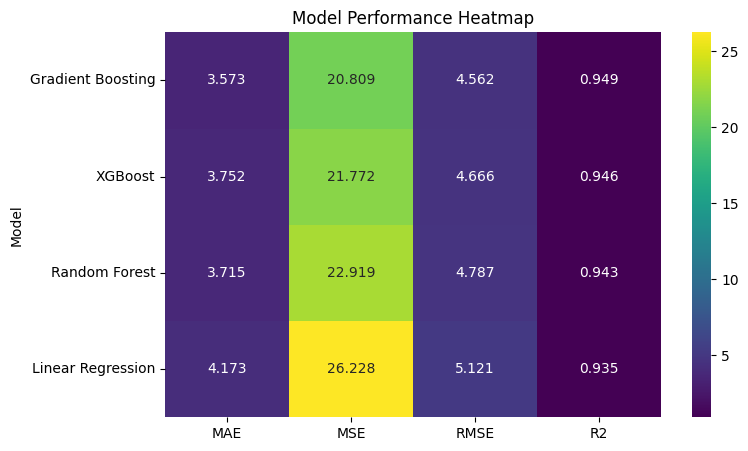

In [24]:
# Convert results dict → DataFrame
df = pd.DataFrame(results).T
df.columns = ["MAE", "MSE", "RMSE", "R2"]

# Sort by R2
df = df.sort_values(by="R2", ascending=False)

plt.figure(figsize=(8,5))
sns.heatmap(df, annot=True, cmap="viridis", fmt=".3f")
plt.title("Model Performance Heatmap")
plt.ylabel("Model")
plt.show()


/tmp/ipython-input-3342942004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_sorted.index, y=df_sorted["R2"], palette="viridis")


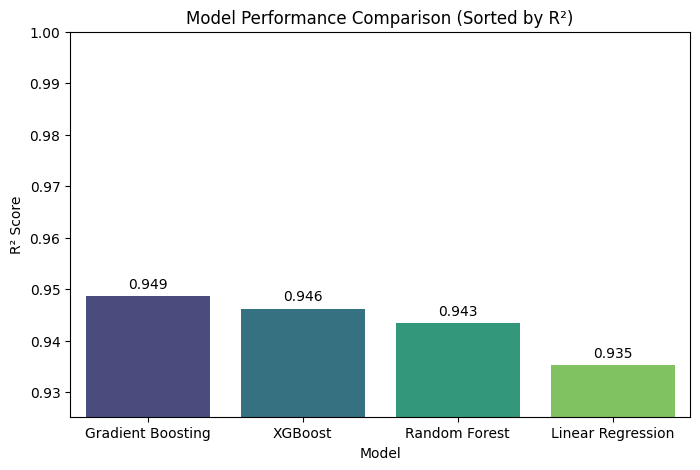

In [25]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x=df_sorted.index, y=df_sorted["R2"], palette="viridis")

# Add value labels with 3 decimal places
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.001,
        f"{p.get_height():.3f}",
        ha="center",
        va="bottom"
    )

plt.title("Model Performance Comparison (Sorted by R²)")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(df_sorted["R2"].min() - 0.01, 1)
plt.show()


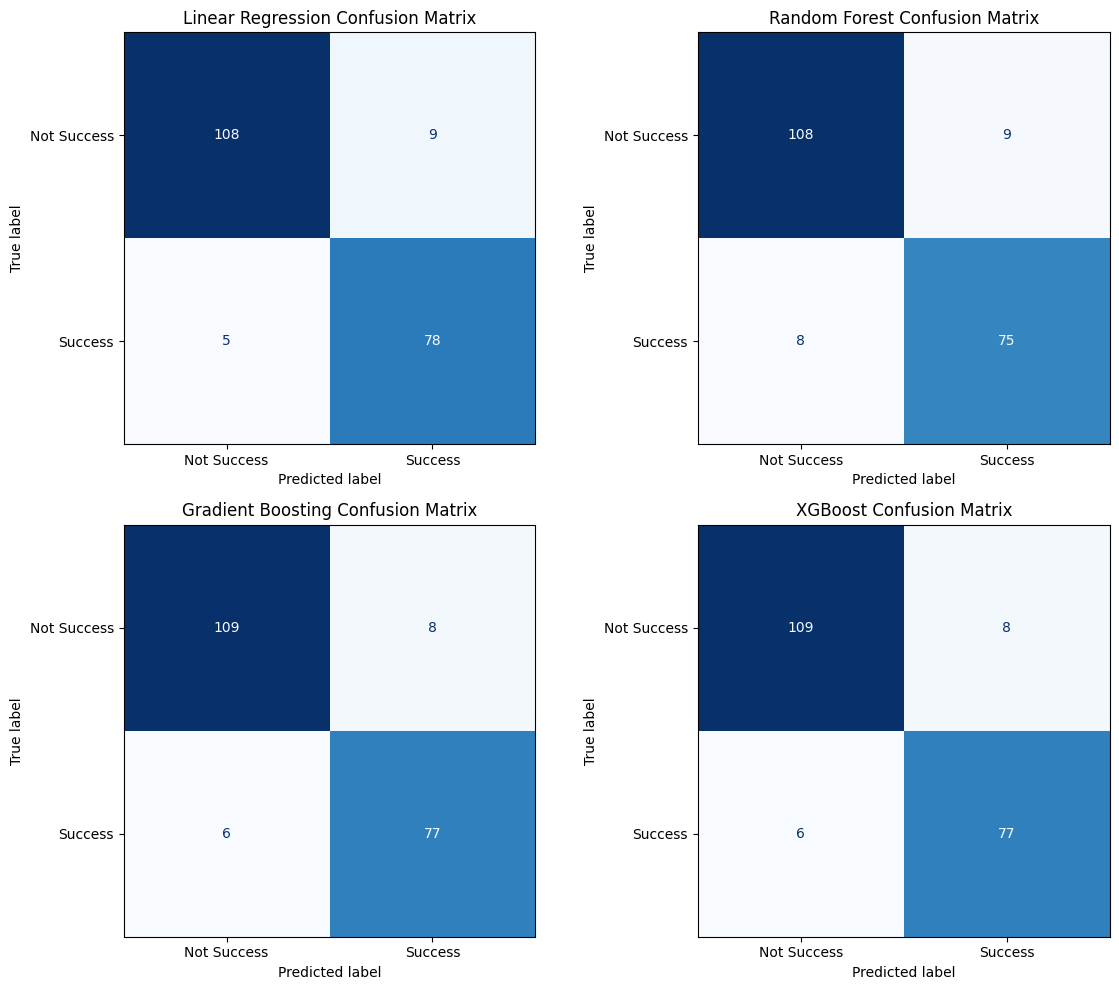

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

threshold = 60   # define success cutoff (change if needed)

# Convert actual target to classes
y_true_class = np.where(y_test_success >= threshold, 1, 0)

plt.figure(figsize=(12,10))

i = 1
for name, model in models.items():

    # Predict using model
    y_pred = model.predict(X_test)

    # Convert predictions to class
    y_pred_class = np.where(y_pred >= threshold, 1, 0)

    # Confusion Matrix
    cm = confusion_matrix(y_true_class, y_pred_class)

    plt.subplot(2,2,i)
    disp = ConfusionMatrixDisplay(cm, display_labels=["Not Success","Success"])
    disp.plot(values_format='d', cmap="Blues", ax=plt.gca(), colorbar=False)
    plt.title(f"{name} Confusion Matrix")

    i += 1

plt.tight_layout()
plt.show()


6.4 — Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10, 15],
    'model__min_samples_split': [2, 5, 10]
}

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train_success)

print("Best Params:", grid.best_params_)
best_model = grid.best_estimator_


Best Params: {'model__max_depth': 5, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gb_success_model = GradientBoostingRegressor().fit(X_train, y_train_success)
gb_stress_model  = GradientBoostingRegressor().fit(X_train, y_train_stress)
gb_error_model   = GradientBoostingRegressor().fit(X_train, y_train_errors)

print("Gradient Boosting Models Trained Successfully")


Gradient Boosting Models Trained Successfully


In [32]:
best_success_model = gb_success_model
best_stress_model  = gb_stress_model
best_error_model   = gb_error_model


#Realtime User input Model

In [35]:
def predict_all(success_model, stress_model, error_model):

    print("Enter developer details:")

    Hours_Coding = float(input("Hours Coding: "))
    Lines_of_Code = float(input("Lines of Code: "))
    Bugs_Found = float(input("Bugs Found: "))
    Bugs_Fixed = float(input("Bugs Fixed: "))
    AI_Usage_Hours = float(input("AI Usage Hours: "))
    Sleep_Hours = float(input("Sleep Hours: "))
    Cognitive_Load = float(input("Cognitive Load: "))
    Coffee_Intake = float(input("Coffee Intake: "))
    Task_Duration_Hours = float(input("Task Duration Hours: "))
    Commits = float(input("Commits: "))

    # Create dataframe with SAME feature names as training
    user_df = pd.DataFrame([[
        Hours_Coding, Lines_of_Code, Bugs_Found, Bugs_Fixed,
        AI_Usage_Hours, Sleep_Hours, Cognitive_Load,
        Coffee_Intake, Task_Duration_Hours, Commits
    ]], columns=[
        "Hours_Coding", "Lines_of_Code", "Bugs_Found", "Bugs_Fixed",
        "AI_Usage_Hours", "Sleep_Hours", "Cognitive_Load",
        "Coffee_Intake", "Task_Duration_Hours", "Commits"
    ])

    success = success_model.predict(user_df)[0]
    stress  = stress_model.predict(user_df)[0]
    err     = error_model.predict(user_df)[0]

    print("\n===== Prediction Results =====")
    print(f"Task Success Rate : {success:.2f}%")
    print(f"Stress Level      : {stress:.2f}")
    print(f"Errors Expected   : {err:.2f}")


In [36]:
predict_all(best_success_model, best_stress_model, best_error_model)


Enter developer details:
Hours Coding: 8
Lines of Code: 300
Bugs Found: 55
Bugs Fixed: 45
AI Usage Hours: 7
Sleep Hours: 6
Cognitive Load: 98
Coffee Intake: 5
Task Duration Hours: 8
Commits: 98

===== Prediction Results =====
Task Success Rate : 32.46%
Stress Level      : 96.95
Errors Expected   : 4.88
